# Image recognition with Keras

Keras is a high level library, used specially for building neural network models. It is written in Python and is compatible with both Python – 2.7 & 3.5. Keras was specifically developed for fast execution of ideas. It has a simple and highly modular interface, which makes it easier to create even complex neural network models. This library abstracts low level libraries, namely Theano and TensorFlow so that, the user is free from “implementation details” of these libraries.

### The key features of Keras are:


- Modularity : Modules necessary for building a neural network are included in a simple interface so that Keras is easier to use for the end user.
- Minimalistic : Implementation is short and concise.
- Extensibility : It’s very easy to write a new module for Keras and makes it suitable for advance research.
 

### Image Classification
Image classification is a method to classify the images into their respective category classes
- Train Data: Train data contains the 200 images of each cars and planes i.e. total their are 400 images in the training dataset
- Test Data: Test data contains 50 images of each cars and planes i.e. total their are 100 images in the test dataset

- Epoch: The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.One epoch means that each sample in the training dataset has had an opportunity to update the internal model parameters. An epoch is comprised of one or more batches.

- Batch: The batch size is a hyperparameter that defines the number of samples to work through before updating the internal model parameters.The batch can be considered as a for-loop iterating over one or more samples and making predictions. At the end of the batch, the predictions are compared to the expected output variables and an error is calculated.

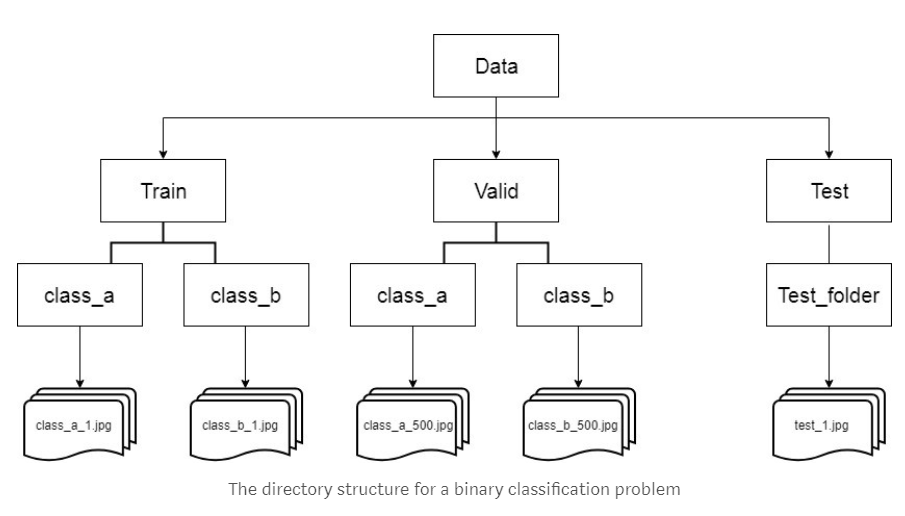

- The directory must be set to the path where your ‘n’ classes of folders are present.
- The target_size is the size of your input images, every image will be resized to this size.
- color_mode: if the image is either black and white or grayscale set “grayscale” or if the image has three colour channels, set “rgb”.
- batch_size: No. of images to be yielded from the generator per batch.
- class_mode: Set “binary” if you have only two classes to predict, if not set to“categorical”, in case if you’re developing an Autoencoder system, both input and the output would probably be the same image, for this case set to “input”.
- shuffle: Set True if you want to shuffle the order of the image that is being yielded, else set False.
-  Random seed for applying random image augmentation and shuffling the order of the image.

In [1]:
#Importing necessary libaries
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import backend as K 

Using TensorFlow backend.


In [2]:
#Every image in the dataset is of the size 224*224.
import os 
train_dir = "‪F:\\ML & Data Visualization\\i_data\\train"
validation_dir = "F:\\ML & Data Visualization\\i_data/test"
train_samp =400
validation_samp = 100
epochs = 10 #10 complete passes through the training dataset.
batch_size = 16 # 16 training examples utilized in one iteration
img_width=224
img_height=224

In [3]:
#Checking format of image
if K.image_data_format() == 'channels_first': 
 input_shape = (3, img_width, img_height) 
else: 
 input_shape = (img_width, img_height, 3) 


#### This part is to check the data format i.e the RGB channel is coming first or last so, whatever it may be, model will check first and then input shape will be feeded accordingly.

- Conv2D is the layer to convolve the image into multiple images
- Activation is the activation function.
- MaxPooling2D is used to max pool the value from the given size matrix and same is used for the next 2 layers. then, Flatten  is used to flatten the dimensions of the image obtained after convolving it.
- Dense is used to make this a fully connected model and is the hidden layer.
- Dropout is used to avoid overfitting on the dataset.
- Dense is the output layer contains only one neuron which decide to which category image belongs.

In [5]:
model = Sequential() 
model.add(Conv2D(32, (2, 2), input_shape=input_shape)) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(32, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(64, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(1)) 
model.add(Activation('sigmoid')) 


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Compile function is used here that involve use of loss, optimizers and metrics.
 - Here loss function used is binary_crossentropy, optimizer used is rmsprop.

In [6]:
model.compile(loss='binary_crossentropy', 
optimizer='rmsprop', 
metrics=['accuracy']) 

## Data Generator
- ImageDataGenerator: that rescales the image, applies shear in some range, zooms the image and does horizontal flipping with the image. This ImageDataGenerator includes all possible orientation of the image.
- train_datagen.flow_from_directory : is the function that is used to prepare data from the train_dataset directory Target_size specifies the target size of the image.
- test_datagen.flow_from_directory is used to prepare test data for the model and all is similar as above.
- fit_generator :  is used to fit the data into the model made above, other factors used are steps_per_epochs tells us about the number of times the model will execute for the training data.
- epochs: tells us the number of times model will be trained in forward and backward pass.
- validation_data: is used to feed the validation/test data into the model.
- validation_steps: denotes the number of validation/test samples.

In [7]:
train_datagen = ImageDataGenerator( 
    rescale=1. / 255, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True) 

test_datagen = ImageDataGenerator(rescale=1. / 255) 

train_generator = train_datagen.flow_from_directory( 
    "F:\\ML & Data Visualization\\i_data\\train", 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory( 
    validation_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode='binary') 

model.fit_generator( 
    train_generator, 
    steps_per_epoch=train_samp // batch_size, 
    epochs=epochs, 
    validation_data=validation_generator, 
    validation_steps=validation_samp // batch_size) 
model.save_weights('model_saved.h5') 



Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
25/25 [==============================] - 35s 1s/step - loss: 0.7901 - acc: 0.6275 - val_loss: 0.4084 - val_acc: 0.8125
Epoch 2/10
25/25 [==============================] - 32s 1s/step - loss: 0.5160 - acc: 0.7750 - val_loss: 0.3636 - val_acc: 0.7738
Epoch 3/10
25/25 [==============================] - 32s 1s/step - loss: 0.4257 - acc: 0.8125 - val_loss: 0.2299 - val_acc: 0.9048
Epoch 4/10
25/25 [==============================] - 32s 1s/step - loss: 0.3843 - acc: 0.8325 - val_loss: 0.3420 - val_acc: 0.8095
Epoch 5/10
25/25 [==============================] - 32s 1s/step - loss: 0.3910 - acc: 0.8475 - val_loss: 0.6001 - val_acc: 0.7500
Epoch 6/10
25/25 [==============================] - 32s 1s/step - loss: 0.3299 - acc: 0.8725 - val_loss: 0.2983 - val_acc: 0.8810
Epoch 7/10
25/25 [==============================] - 32s 1s/step - loss: 0.3141 - acc: 0.87